In [210]:
import pickle
import azureml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
import re


In [211]:
# from azureml.core import Workspace
# from azureml.core.compute import ComputeTarget

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.core.dataset import Dataset
from azureml.train.automl import AutoMLConfig
from azureml.interpret import ExplanationClient

In [212]:
ws = Workspace.get(name = 'Azure_DS_workspace',
                  subscription_id='7910d7f1-3a32-4f77-b718-0a9b8bb1db72',
                  resource_group='Azure_DS')

In [213]:
ws.get_details()

{'id': '/subscriptions/7910d7f1-3a32-4f77-b718-0a9b8bb1db72/resourceGroups/Azure_DS/providers/Microsoft.MachineLearningServices/workspaces/Azure_DS_workspace',
 'name': 'Azure_DS_workspace',
 'location': 'westus',
 'type': 'Microsoft.MachineLearningServices/workspaces',
 'tags': {},
 'sku': 'Basic',
 'workspaceid': 'da89adbc-419f-461f-83ff-ec7f695680d8',
 'sdkTelemetryAppInsightsKey': '23040a33-1c3e-4782-a462-da85bf9238bb',
 'description': '',
 'friendlyName': 'Azure_DS_workspace',
 'creationTime': '2021-05-01T18:08:33.9866295+00:00',
 'containerRegistry': '/subscriptions/7910d7f1-3a32-4f77-b718-0a9b8bb1db72/resourceGroups/Azure_DS/providers/Microsoft.ContainerRegistry/registries/da89adbc419f461f83ffec7f695680d8',
 'keyVault': '/subscriptions/7910d7f1-3a32-4f77-b718-0a9b8bb1db72/resourcegroups/azure_ds/providers/microsoft.keyvault/vaults/azuredsworkspa7950443874',
 'applicationInsights': '/subscriptions/7910d7f1-3a32-4f77-b718-0a9b8bb1db72/resourcegroups/azure_ds/providers/microsoft.in

In [214]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [215]:
train

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.",-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically. ""I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in.""\n""Oh, you angel mother! You blessed lady! How good you are!"" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, and she laughingly accepted defeat.\n""Only because Patty's not quite back on her game yet,"" Roger defended; ""this child has been on the sick list, you know, Sam, and she isn't up to her own mark.""\n""Well, I like that!"" cried Patty; ""suppose you bear half the blame, Roger. You see, Mr. Blaney, he is so absorbed in his own Love Game, he can't play with his old-time skill.""\n""All right, Patsy, let it go at that. And it's so, too. I suddenly remembered something Mona told me to tell you, and it affected my service.""",-0.580118,0.476676
3,dd1000b26,NaN,NaN,"And outside before the palace a great garden was walled round, filled full of stately fruit-trees, gray olives and sweet figs, and pomegranates, pears, and apples, which bore the whole year round. For the rich south-west wind fed them, till pear grew ripe on pear, fig on fig, and grape on grape, all the winter and the spring. And at the farther end gay flower-beds bloomed through all seasons of the year; and two fair fountains rose, and ran, one through the garden grounds, and one beneath the palace gate, to water all the town. Such noble gifts the heavens had given to Alcinous the wise.\nSo they went in, and saw him sitting, like Poseidon, on his throne, with his golden sceptre by him, in garments stiff with gold, and in his hand a sculptured goblet, as he pledged the merchant kings; and beside him stood Arete, his wise and lovely queen, and leaned against a pillar as she spun her golden threads.",-1.054013,0.4500

<AxesSubplot:ylabel='Frequency'>

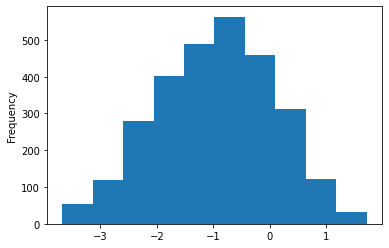

In [216]:
train.target.plot.hist()

In [217]:
#random number of characters removed between 10 and 30 from end or beginning of excerpt
import random
def remove_char(text):
    num = random.randint(15,35)
    num2 = random.randint(0,1)
    
    if num2 == 0:
        return text[num:]
    else:
        return text[:-num]

In [218]:
#select only values less than -2 and greater than 0
group = train[(train['target']<-2) | (train['target']>0)]
group['mod'] =  group.excerpt.apply(lambda x: remove_char(x))
group.drop(columns =['excerpt'],axis = 1,inplace = True)
group = group.rename(columns = {"mod":"excerpt"})
group




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,url_legal,license,target,standard_error,excerpt
4,37c1b32fb,NaN,NaN,0.247197,0.510845,"there were Three Bears who lived together in a house of their own in a wood. One of them was a Little, Small, Wee Bear; and one was a Middle-sized Bear, and the other was a Great, Huge Bear. They had each a pot for their porridge; a little pot for the Little, Small, Wee Bear; and a middle-sized pot for the Middle Bear; and a great pot for the Great, Huge Bear. And they had each a chair to sit in; a little chair for the Little, Small, Wee Bear; and a middle-sized chair for the Middle Bear; and a great chair for the Great, Huge Bear. And they had each a bed to sleep in; a little bed for the Little, Small, Wee Bear; and a middle-sized bed for the Middle Bear; and a great bed for the Great, Huge Bear."
10,c57b50918,NaN,NaN,-3.081337,0.553260,"It was believed by the principal men of Virginia that Talbot's sympathies were with the revolted colonies; but the influence of his mother, to whom he had been accustomed to defer, had hitherto proved sufficient to prevent him from openly declaring himself. His visit to England, and the delightful reception he had met with there, had weakened somewhat the ties which bound him to his native country, and he found himself in a state of indecision as humiliating as it was painful. Lord Dunmore and Colonel Wilton had each made great efforts to enlist his support, on account of his wealth and position and high personal qualities. It was hinted by one that the ancient barony of the Talbots would be revived by the king; and the gratitude of a free and grateful country, with the consciousness of having materially aided in acquiring that independence which should be the birthright of every Englishman, was eloquently portrayed by the other. When to the last plea was added the personal preference of Katharine Wilton, the balance was overcome, and the hopes of the mother were do"
11,8d8a2667f,NaN,NaN,-2.145248,0.518351,"ears old. He was of good birth and rich, and was the father of a large and interesting family, which he prudently left behind him in Spain. His wife, however, insisted on going with him to the New World. Whether or not this was a proof of wifely devotion—and if it was, it is the only thing in history to his credit—or of an unwillingness to trust Pedrarias out of her sight, which is more likely, is not known. At any rate, she went along.\nPedrarias, up to the time of his departure from Spain, had enjoyed two nick-names, El Galan and El Justador. He had been a bold and dashing cavalier in his youth, a famous tilter in tournaments in his middle age, and a hard-fighting soldier all his life. His patron was Bishop Fonseca. Whatever qualities he might possess for the important work about to be devolved upon him would be developed later."
14,587502a70,NaN,NaN,0.245806,0.491793,"Aunt Abigail was gone, Eleanor was gone. The room was quite empty except for the bright sunshine pouring in through the small-paned windows. Elizabeth Ann stretched and yawned and looked about her. What funny wall-paper it was—so old-fashioned looking! The picture was of a blue river and a brown mill, with green willow-trees over it, and a man with sacks on his horse's back stood in front of the mill. This picture was repeated a great many times, all over the paper; and in the corner, where it hadn't come out even, they had had to cut it right down the middle of the horse. It was very curious-looking. She stared at it a long time, waiting for somebody to tell her when to get up. At home Aunt Frances always told her, and helped her get dressed. But here nobody came. She discovered that the heat came from a hole in the floor near the bed, which opened down into the room below. From it came a warm breath of baking bread and a muffled"
20,a9ebe5d33,NaN,NaN,0.281178,0.510595,"at and walked away, and Philip and his sister went home. She seemed different, somehow, and he was sent to bed a little earlier than usual, but he could not go to sl

In [219]:
mod_train = pd.concat([train,group],sort = 'False')

In [220]:
mod_train

,excerpt,id,license,standard_error,target,url_legal
0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.",c12129c31,NaN,0.464009,-0.340259,NaN
1,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically. ""I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in.""\n""Oh, you angel mother! You blessed lady! How good you are!"" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.",85aa80a4c,NaN,0.480805,-0.315372,NaN
2,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, and she laughingly accepted defeat.\n""Only because Patty's not quite back on her game yet,"" Roger defended; ""this child has been on the sick list, you know, Sam, and she isn't up to her own mark.""\n""Well, I like that!"" cried Patty; ""suppose you bear half the blame, Roger. You see, Mr. Blaney, he is so absorbed in his own Love Game, he can't play with his old-time skill.""\n""All right, Patsy, let it go at that. And it's so, too. I suddenly remembered something Mona told me to tell you, and it affected my service.""",b69ac6792,NaN,0.476676,-0.580118,NaN
3,"And outside before the palace a great garden was walled round, filled full of stately fruit-trees, gray olives and sweet figs, and pomegranates, pears, and apples, which bore the whole year round. For the rich south-west wind fed them, till pear grew ripe on pear, fig on fig, and grape on grape, all the winter and the spring. And at the farther end gay flower-beds bloomed through all seasons of the year; and two fair fountains rose, and ran, one through the garden grounds, and one beneath the palace gate, to water all the town. Such noble gifts the heavens had given to Alcinous the wise.\nSo they went in, and saw him sitting, like Poseidon, on his throne, with his golden sceptre by him, in garments stiff with gold, and in his hand a sculptured goblet, as he pledged the merchant kings; and beside him stood Arete, his wise and lovely queen, and leaned against a pillar as she spun her golden threads.",dd1000b26,NaN,0.450007,-1.054013,N

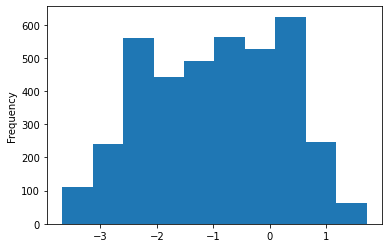

In [221]:
mod_train.target.plot.hist()
train = mod_train

<AxesSubplot:ylabel='Frequency'>

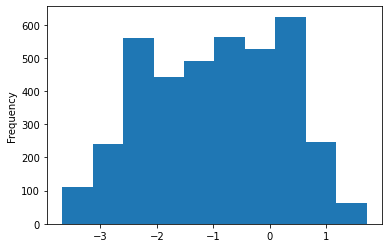

In [222]:
train.target.plot.hist()

In [223]:
# ------------------------------------
def word_lenth_counts(text):
    '''
        Return: 
            Dictionry of words length counts 
    '''
    
    d = {"1_letter": 0, 
         "2_letter": 0, 
         "3_letter": 0, 
         "4_letter": 0, 
         "5_letter": 0, 
         "6_letter": 0, 
         "7_letter": 0, 
         "8_letter": 0, 
         "9_letter": 0, 
         "10_letter": 0, 
         "11_letter": 0, 
         "12_letter": 0
    }

    text.replace('\n', '')
    text = text.lower()
    n_text = ''
    for c in text: 
        if c not in punctuation:
            n_text += c
        else: n_text += ' '

    text = n_text
    for word in text.split(' '): 
        wl = len(word)
        if wl > 0:
            if len(word) >= 12: key = f"12_letter"
            else:  key = f"{len(word)}_letter"

            d[key] += 1; 
    return d
# ------------------------------------
def source_info(text):
    '''
        Return: 
            Dictionary of source wiki, article, book, details, story or stories, kid, edu, simple
    '''
    d = dict()
    source_type = ['wiki', 'article', 'book', 'details', 'kid', 'edu', 'simple', 'story', 'stories']
    
    for t in source_type:
        if t != 'stories': 
            d[t] = 0
            
        if t in text:
            if t == 'stories': 
                d['story'] = 1;
            else: d[t] = 1
    return d
# ------------------------------------
def document_info(text):
    '''
        Return:
            Dictionary of document lenght, word count, sentence count, average word lenght
    '''
    text_lenght = len(text)
    text = text.replace('\n', ' ')
    text_word_count = len(text.split(' '))
    text_sentence_count = len(text.split('.'))
    text_avg_word_length = round(sum([len(t) for t in text.split(' ')]) / text_word_count, 2)

    document_info = {
        'doc_len': text_lenght,
        'word_count': text_word_count,
        'sent_count': text_sentence_count,
        'avg_word_len': text_avg_word_length
    }

    return document_info
    
# ------------------------------------
def character_counts(text):
    '''
        Return:
            Dictionary of counts of all characters in text
    '''
    char_dict = dict()
    text = text.lower()
    text = text.replace('\n', ' ')
    
    for char in text:
        if char not in char_dict:
            char_dict[char] = 0
        
        char_dict[char] += 1     
        
    return char_dict

# ------------------------------------
def phonemes_counts(text):
    '''
        Return: 
            Dictionay of all phonemic in text
    '''
    phonemes = ['ck', 'cc', 'di', 'nn', 'dd', 'ai', 'ss', 'mn', 'bb', 
                'sci', 'ze', 'qu', 'se', 'sc', 'ci', 'ps', 'si', 'tch', 
                'ngue', 'st', 'gu', 'th', 'pn', 've', 'te', 'zz', 'au', 
                'lm', 'lf', 'ge', 'wh', 'tu', 'wr', 'ph', 'sh', 'mm', 'gh', 
                'dge', 'ft', 'tt', 'ed', 'ng', 'lk', 'ti', 'gue', 'rr', 'ch', 
                'll', 'gn', 'ff', 'gg', 'pp', 'rh', 'ce', 'mb', 'kn', 
                'eer', 'ere', 'uy', 'ho', 'ear', 'ei', 'ar', 'ai', 
                'oor', 'ure', 'eigh', 'ey', 'is', 'ae', 'ow', 'or', 'ew', 
                'ore', 'ur', 'uoy', 'air', 'au', 'ough', 'yr', 
                'ea', 'ayer', 'augh', 'aw', 'eau', 'aigh', 'igh', 'oy', 
                'oo', 'ue', 'are', 'ee', 'oa', 'et', 'y', 'er', 'eir', 
                'oew', 'oar', 'ie', 'eo', 'ui', 'ier', 'ou', 'ir', 'oi', 
                'ay', 'ye', 'oe', 'our']
    temp_dict = dict()
    
    # lower text 
    text = text.lower()
    
    for p in phonemes:
        temp_dict[p] = text.count(p)
    
    return temp_dict

In [224]:
#combine train and test set for pre-processing

c_df = pd.concat([train, test], axis = 0)
c_df.shape

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(3873, 6)

In [225]:
# series_documents =  train.excerpt.apply(lambda x: document_info(x))
# series_phonemes = train.excerpt.apply(lambda x: phonemes_counts(x))
# series_characters =  train.excerpt.apply(lambda x: character_counts(x))
# series_word_length = train.excerpt.apply(lambda x: word_lenth_counts(x))

# series_documents_test =  test.excerpt.apply(lambda x: document_info(x))
# series_phonemes_test = test.excerpt.apply(lambda x: phonemes_counts(x))
# series_characters_test =  test.excerpt.apply(lambda x: character_counts(x))
# series_word_length_test = test.excerpt.apply(lambda x: word_lenth_counts(x))

series_documents =  c_df.excerpt.apply(lambda x: document_info(x))
series_phonemes = c_df.excerpt.apply(lambda x: phonemes_counts(x))
series_characters =  c_df.excerpt.apply(lambda x: character_counts(x))
series_word_length = c_df.excerpt.apply(lambda x: word_lenth_counts(x))

In [226]:
df_documents = pd.DataFrame(list(series_documents))
df_phonemes = pd.DataFrame(list(series_phonemes))
df_chracters = pd.DataFrame(list(series_characters))
df_word_lenght = pd.DataFrame(list(series_word_length))

# df_documents_test = pd.DataFrame(list(series_documents_test))
# df_phonemes_test = pd.DataFrame(list(series_phonemes_test))
# df_chracters_test = pd.DataFrame(list(series_characters_test))
# df_word_lenght_test = pd.DataFrame(list(series_word_length_test))


In [227]:
# Make na 0
df_chracters.fillna(0, inplace = True)
#df_chracters_test.fillna(0, inplace = True)


# Make all ints (change NaN to 0)
for col in df_chracters.columns:
    df_chracters[col] = df_chracters[col].astype(int, copy=False)

#for col in df_chracters_test.columns:
#    df_chracters_test[col] = df_chracters_test[col].astype(int, copy=False)

    

In [228]:
df_y =train['target']

In [229]:
train

,excerpt,id,license,standard_error,target,url_legal
0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.",c12129c31,NaN,0.464009,-0.340259,NaN
1,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically. ""I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in.""\n""Oh, you angel mother! You blessed lady! How good you are!"" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.",85aa80a4c,NaN,0.480805,-0.315372,NaN
2,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, and she laughingly accepted defeat.\n""Only because Patty's not quite back on her game yet,"" Roger defended; ""this child has been on the sick list, you know, Sam, and she isn't up to her own mark.""\n""Well, I like that!"" cried Patty; ""suppose you bear half the blame, Roger. You see, Mr. Blaney, he is so absorbed in his own Love Game, he can't play with his old-time skill.""\n""All right, Patsy, let it go at that. And it's so, too. I suddenly remembered something Mona told me to tell you, and it affected my service.""",b69ac6792,NaN,0.476676,-0.580118,NaN
3,"And outside before the palace a great garden was walled round, filled full of stately fruit-trees, gray olives and sweet figs, and pomegranates, pears, and apples, which bore the whole year round. For the rich south-west wind fed them, till pear grew ripe on pear, fig on fig, and grape on grape, all the winter and the spring. And at the farther end gay flower-beds bloomed through all seasons of the year; and two fair fountains rose, and ran, one through the garden grounds, and one beneath the palace gate, to water all the town. Such noble gifts the heavens had given to Alcinous the wise.\nSo they went in, and saw him sitting, like Poseidon, on his throne, with his golden sceptre by him, in garments stiff with gold, and in his hand a sculptured goblet, as he pledged the merchant kings; and beside him stood Arete, his wise and lovely queen, and leaned against a pillar as she spun her golden threads.",dd1000b26,NaN,0.450007,-1.054013,N

In [230]:
type(df_y)
df_y.reset_index(drop=True, inplace = True)

In [231]:
type(df_documents)

pandas.core.frame.DataFrame

In [232]:
df_X = pd.concat([df_documents, df_phonemes, df_word_lenght,df_y],axis =1)

#df_X_test = pd.concat([df_documents_test, df_phonemes_test, df_word_lenght_test], axis = 1)


In [233]:
df_X

,doc_len,word_count,sent_count,avg_word_len,ck,cc,di,nn,dd,ai,...,4_letter,5_letter,6_letter,7_letter,8_letter,9_letter,10_letter,11_letter,12_letter,target
0,992,179,12,4.55,1,0,1,0,0,1,...,49,21,10,9,10,8,3,0,0,-0.340259
1,937,169,11,4.55,0,0,1,1,1,3,...,30,17,15,12,5,2,5,2,0,-0.315372
2,908,166,12,4.48,3,1,1,1,1,4,...,35,24,7,11,9,3,2,0,0,-0.580118
3,909,164,6,4.55,0,0,0,0,0,3,...,31,21,20,15,4,1,1,0,1,-1.054013
4,723,147,6,3.93,0,0,0,0,7,4,...,28,28,14,0,2,0,0,0,0,0.247197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,948,174,14,4.45,0,0,2,1,0,5,...,34,14,18,11,11,3,1,0,0,NaN
3869,1144,182,8,5.29,0,1,13,0,0,0,...,24,19,11,18,23,6,9,7,1,NaN
3870,1094,168,7,5.52,2,0,5,0,0,0,...,18,18,11,26,8,18,6,6,0,NaN
3871,823,148,8,4.57,0,0,2,0,0,1,...,39,7,12,17,3,2,0,3,3,NaN


In [234]:
df_X = df_X.T.drop_duplicates().T
# df_X_test = df_X_test.T.drop_duplicates().T


In [235]:
df_X_test = df_X.iloc[2834:]
df_X = df_X.iloc[:2834]
df_X

,doc_len,word_count,sent_count,avg_word_len,ck,cc,di,nn,dd,ai,...,4_letter,5_letter,6_letter,7_letter,8_letter,9_letter,10_letter,11_letter,12_letter,target
0,992.0,179.0,12.0,4.55,1.0,0.0,1.0,0.0,0.0,1.0,...,49.0,21.0,10.0,9.0,10.0,8.0,3.0,0.0,0.0,-0.340259
1,937.0,169.0,11.0,4.55,0.0,0.0,1.0,1.0,1.0,3.0,...,30.0,17.0,15.0,12.0,5.0,2.0,5.0,2.0,0.0,-0.315372
2,908.0,166.0,12.0,4.48,3.0,1.0,1.0,1.0,1.0,4.0,...,35.0,24.0,7.0,11.0,9.0,3.0,2.0,0.0,0.0,-0.580118
3,909.0,164.0,6.0,4.55,0.0,0.0,0.0,0.0,0.0,3.0,...,31.0,21.0,20.0,15.0,4.0,1.0,1.0,0.0,1.0,-1.054013
4,723.0,147.0,6.0,3.93,0.0,0.0,0.0,0.0,7.0,4.0,...,28.0,28.0,14.0,0.0,2.0,0.0,0.0,0.0,0.0,0.247197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,901.0,145.0,11.0,5.22,1.0,0.0,12.0,2.0,0.0,1.0,...,27.0,32.0,10.0,12.0,4.0,9.0,7.0,0.0,2.0,1.711390
2830,890.0,164.0,14.0,4.43,4.0,0.0,1.0,0.0,0.0,1.0,...,37.0,24.0,18.0,7.0,5.0,7.0,1.0,0.0,1.0,0.189476
2831,949.0,190.0,17.0,4.00,0.0,0.0,1.0,0.0,1.0,1.0,...,36.0,18.0,20.0,15.0,2.0,3.0,0.0,0.0,1.0,0.255209
2832,864.0,150.0,13.0,4.77,0.0,0.0,1.0,0.0,0.0,3.0,...,28.0,23.0,19.0,5.0,7.0,4.0,3.0,0.0,1.0,-0.215279


In [236]:
df_X_test

,doc_len,word_count,sent_count,avg_word_len,ck,cc,di,nn,dd,ai,...,4_letter,5_letter,6_letter,7_letter,8_letter,9_letter,10_letter,11_letter,12_letter,target
2834,706.0,143.0,6.0,3.94,0.0,0.0,0.0,0.0,7.0,4.0,...,25.0,28.0,14.0,0.0,2.0,0.0,0.0,0.0,0.0,0.247197
2835,1082.0,184.0,5.0,4.89,0.0,2.0,0.0,0.0,1.0,2.0,...,21.0,15.0,14.0,16.0,12.0,9.0,10.0,1.0,2.0,-3.081337
2836,841.0,155.0,10.0,4.43,1.0,0.0,2.0,0.0,1.0,2.0,...,20.0,21.0,10.0,8.0,6.0,7.0,1.0,2.0,2.0,-2.145248
2837,944.0,176.0,11.0,4.37,2.0,0.0,1.0,2.0,1.0,2.0,...,43.0,25.0,15.0,14.0,3.0,3.0,1.0,0.0,0.0,0.245806
2838,763.0,149.0,7.0,4.13,1.0,0.0,1.0,0.0,0.0,1.0,...,30.0,16.0,12.0,9.0,1.0,3.0,1.0,0.0,0.0,0.281178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,948.0,174.0,14.0,4.45,0.0,0.0,2.0,1.0,0.0,5.0,...,34.0,14.0,18.0,11.0,11.0,3.0,1.0,0.0,0.0,NaN
3869,1144.0,182.0,8.0,5.29,0.0,1.0,13.0,0.0,0.0,0.0,...,24.0,19.0,11.0,18.0,23.0,6.0,9.0,7.0,1.0,NaN
3870,1094.0,168.0,7.0,5.52,2.0,0.0,5.0,0.0,0.0,0.0,...,18.0,18.0,11.0,26.0,8.0,18.0,6.0,6.0,0.0,NaN
3871,823.0,148.0,8.0,4.57,0.0,0.0,2.0,0.0,0.0,1.0,...,39.0,7.0,12.0,17.0,3.0,2.0,0.0,3.0,3.0,NaN


In [206]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df_X, test_size=0.2, random_state=223)

In [207]:
import logging

automl_settings = {
    "iteration_timeout_minutes": 10,
    "experiment_timeout_hours": 0.3,
    "enable_early_stopping": True,
    "primary_metric": 'normalized_root_mean_squared_error',
    "featurization": 'auto',
    "verbosity": logging.INFO,
    "n_cross_validations": 5
}

In [208]:
automl_config = AutoMLConfig(task = 'regression',
                             debug_log = 'automl_errors.log',
                             training_data = x_train,
                             label_column_name = 'target',
                             **automl_settings
                            )

In [209]:
experiment_name = 'Commonlit-local-Marketne-changes'
experiment=Experiment(ws, experiment_name)

output = {}
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
outputDf = pd.DataFrame(data = output, index = [''])
outputDf.T


,
Subscription ID,7910d7f1-3a32-4f77-b718-0a9b8bb1db72
Workspace,Azure_DS_workspace
Resource Group,Azure_DS
Location,westus
Experiment Name,Commonlit-local-Marketne-changes


In [27]:
local_run = experiment.submit(automl_config, show_output = True)

Running on local machine
Parent Run ID: AutoML_5819d4fc-bf4b-4578-b9cb-f5e2263cb890

Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Beginning to fit featurizers and featurize the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values were detected in the training data.
              Learn more about missing value imputation: https://aka.ms/AutomatedMLFeaturization

****************************************************************************************************

TYPE:         High cardi

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(104, 'ECONNRESET')"))': /azureml/ExperimentRun/dcid.AutoML_5819d4fc-bf4b-4578-b9cb-f5e2263cb890_19/outputs/conda_env_v_1_0_0.yml?sv=2019-02-02&sr=b&sig=Qh4pds5d0Ohcb7ZMGUJKXmzB9Xiw1%2F3fN%2FF8udXblzo%3D&st=2021-05-21T20%3A11%3A13Z&se=2021-05-22T20%3A21%3A13Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D&timeout=30


MinMaxScaler DecisionTree                      0:00:15       0.1712    0.1478
        20   StandardScalerWrapper LassoLars                0:00:16       0.1488    0.1478
        21   StandardScalerWrapper DecisionTree             0:00:15       0.1727    0.1478
        22   RobustScaler RandomForest                      0:00:18       0.1581    0.1478
        23   MaxAbsScaler RandomForest                      0:00:18       0.1654    0.1478
        24   MaxAbsScaler GradientBoosting                  0:00:37       0.1496    0.1478
        25   PCA ElasticNet                                 0:00:15       0.1917    0.1478
        26   RobustScaler RandomForest                      0:00:15       0.1592    0.1478
        27   

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(104, 'ECONNRESET')"))': /azureml/ExperimentRun/dcid.AutoML_5819d4fc-bf4b-4578-b9cb-f5e2263cb890_27/outputs/model.pkl?sv=2019-02-02&sr=b&sig=57u9QQdvZdtoeyhD04yXiCeQ7vHS%2BPP3fcy0BTZlyS4%3D&st=2021-05-21T20%3A14%3A19Z&se=2021-05-22T20%3A24%3A19Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D&timeout=30
WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(104, 'ECONNRESET')"))': /azureml/ExperimentRun/dcid.AutoML_5819d4fc-bf4b-4578-b9cb-f5e2263cb890_27/outputs/scoring_file_v_1_0_0.py?sv=2019-02-02&sr=b&sig=vSjiYR6lDwdBD%2B8TaAycu5SHbc45ZSLZQ3nHvp46iks%3D&st=2021-05-21T20%3A14%3A19Z&se=2021-05-22T20%3A24%3A19Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURB

StandardScalerWrapper ExtremeRandomTrees       0:00:35       0.1544    0.1478
        28   MinMaxScaler RandomForest                      0:00:17       0.1608    0.1478
        29   StandardScalerWrapper RandomForest             0:01:12       0.1497    0.1478
        30   VotingEnsemble                                 0:00:55       0.1446    0.1446
        31   StackEnsemble                                  0:00:52       0.1447    0.1446
Stopping criteria reached at iteration 32. Ending experiment.
****************************************************************************************************
Current status: BestRunExplainModel. Best run model explanations started
Current status: ModelExplanationDataSetSetup. Model explanations data setup completed
Current status: PickSurrogateModel. Choosing LightGBM as the surrogate model for explanations
Current status: EngineeredFeatureExplanations. Computation of engineered features started
Current status: EngineeredFeatureExplanations. Compu

In [1]:
best_run, fitted_model = local_run.get_output()
print(best_run)
print(fitted_model)

NameError: name 'local_run' is not defined

In [129]:
y_test = x_test.pop('target')

y_predict = fitted_model.predict(x_test)
print(y_predict[:10])

[ 0.32581944 -0.11617363 -1.12854974 -1.18239724 -1.27583984 -0.29739247
 -1.94680389 -1.99770246 -1.0185855  -1.53932385]


In [130]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_actual = y_test.values.flatten().tolist()
rmse = sqrt(mean_squared_error(y_actual, y_predict))
rmse

0.747579762355829

## Submission

In [134]:
df_X_test = df_X_test.drop(['target'],axis=1)

y_predict = fitted_model.predict(df_X_test)
print(y_predict[:10])

[-0.69944621 -0.16837356 -0.58493931 -2.16809658 -1.2875082  -1.1111762
 -0.09716158]


In [ ]:
submission = pd.read_csv()

In [ ]:
score()

RegressionPipeline(pipeline=Pipeline(memory=None,
                                     steps=[('datatransformer',
                                             DataTransformer(enable_dnn=None,
                                                             enable_feature_sweeping=None,
                                                             feature_sweeping_config=None,
                                                             feature_sweeping_timeout=None,
                                                             featurization_config=None,
                                                             force_text_dnn=None,
                                                             is_cross_validation=None,
                                                             is_onnx_compatible=None,
                                                             logger=None,
                                                             observer=None,
                                         